<a href="https://colab.research.google.com/github/AntonioPQMartins/Finance/blob/master/LSTM_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program uses an AI recurrent NN called Long Short Term Memory (LSTM)
#   to predict the clsoing stock price of a corporation (Apple Inc.) using the past 60 day stock price.



In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [0]:
from pandas.util.testing import assert_frame_equal

In [42]:
#Get stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-20')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-05-14,309.790009,301.529999,304.510010,309.540009,39732300.0,309.540009
2020-05-15,307.899994,300.209991,300.350006,307.709991,41587100.0,307.709991
2020-05-18,316.500000,310.320007,313.170013,314.959991,33843100.0,314.959991


In [43]:
df.shape

(2109, 6)

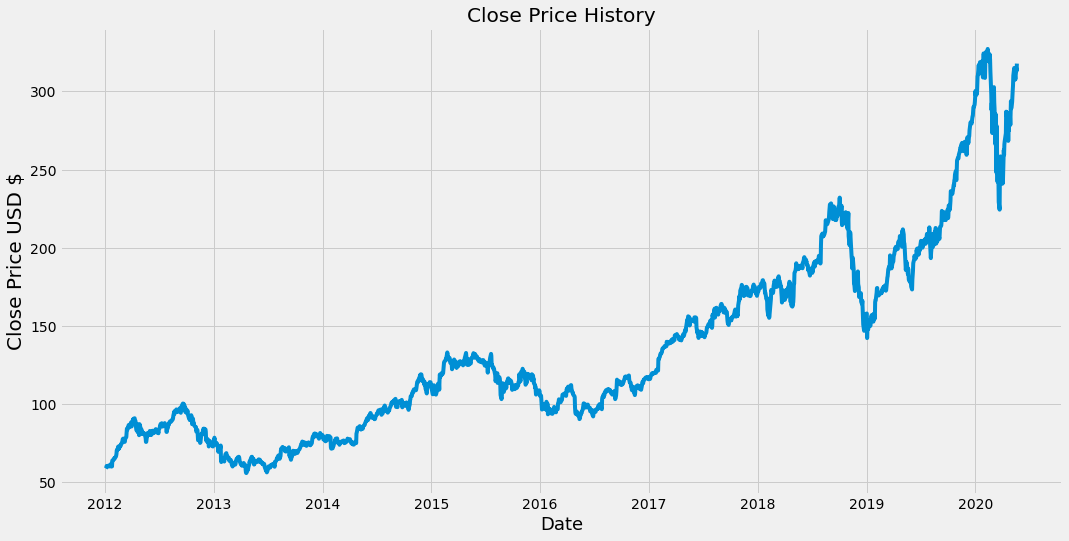

In [44]:
#Closing price hist.
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=20)
plt.show()

In [56]:
#Keep close column
data= df.filter(['Close'])

#Convert df to numpy array
dataset= data.values

#get rows to train the model
training_data_len= math.ceil( len(dataset) * .8)

training_data_len



1688

In [57]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.9549021 ],
       [0.94819647],
       [0.96547649]])

In [59]:
#Create scaled training data set
train_data= scaled_data[0:training_data_len, :]
#Split data into x_train , y_train
x_train= []
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [0]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [62]:
#Reshape
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1628, 60, 1)

In [0]:
#Build LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
#train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

Epoch 1/1
1628/1628 [==============================] - 65s 40ms/step - loss: 6.0420e-04


In [0]:
#Create the testing data set
#testing data set
test_data=scaled_data[training_data_len-60: , :]
#create dataset test
x_test=[]
y_test= dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [0]:
#Get models predicted price values
predictions = model.predict(x_test)
predictions= scaler.inverse_transform(predictions)


In [76]:
#Get cost function - RMSE
rmse= np.sqrt(np.mean( predictions - y_test)**2)
rmse

9.660091699160759

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


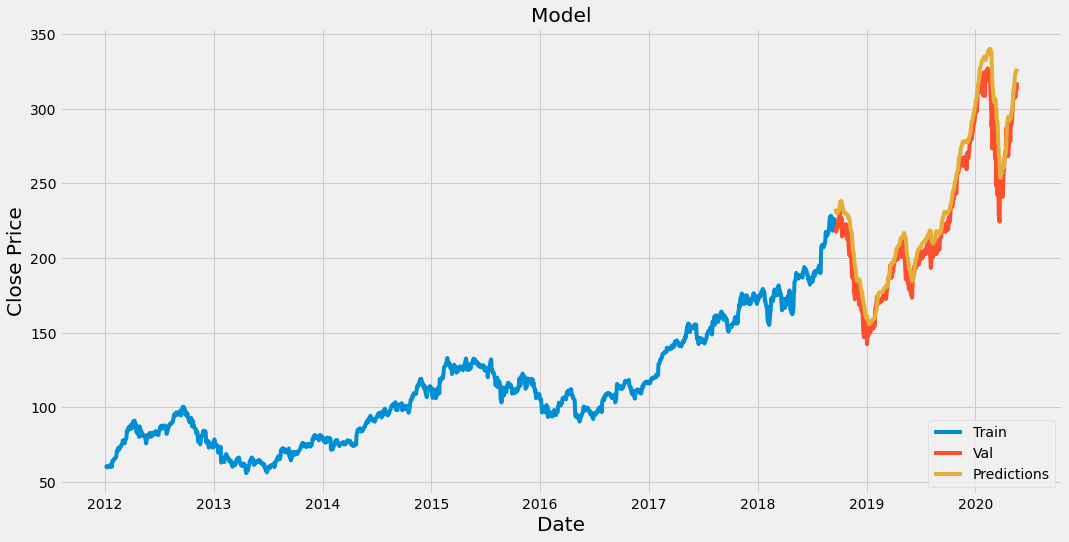

In [82]:
#PLot the data
train= data[:training_data_len]

valid=data[training_data_len:]

valid['Predictions'] = predictions
#Visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize =20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [83]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-09-18,218.240005,233.046692
2018-09-19,218.369995,232.186157
2018-09-20,220.029999,231.301483
2018-09-21,217.660004,230.722290
2018-09-24,220.789993,230.061554
...,...,...
2020-05-14,309.540009,322.942200
2020-05-15,307.709991,324.358002
2020-05-18,314.959991,325.002472


In [84]:
#Get the quote
apple_quote= web.DataReader('AAPL',data_source='yahoo',start='2015-01-01',end='2020-05-20')
#Create new df
new_df= apple_quote.filter(['Close'])
#Get last 60 day closing prices
last_60_days= new_df[-60:].values
#Scale data to be values between 0 and 1
last_60_days_scaled= scaler.transform(last_60_days)
#Create empty list
X_test= []
X_test.append(last_60_days_scaled)
#Convert X_test to np array
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price= model.predict(X_test)

pred_price=scaler.inverse_transform(pred_price)
print(pred_price)



[[328.5213]]


In [85]:
apple_quote2= web.DataReader('AAPL',data_source='yahoo',start='2020-05-20',end='2020-05-20')
print(apple_quote2['Close'])


Date
2020-05-20    317.920013
Name: Close, dtype: float64
